In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [5]:
#Bank of America
#CitiGroup
#Goldman Sachs
#JPMorgan Chase
#Morgan Stanley
#Wells Fargo

#Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate 
#dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:

#Use datetime to set start and end datetime objects.
#Figure out the ticker symbol for each bank.
#Figure out how to use datareader to grab info on the stock.



# Bank of America

start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
BAC = data.DataReader("BAC", 'yahoo', start, end)

In [7]:
#CitiGroup

C = data.DataReader("C", 'yahoo', start, end)

In [8]:
#Goldman Sachs

GS = data.DataReader("GS", 'yahoo', start, end)

In [9]:
#JPMorgan Chase

JPM = data.DataReader("JPM", 'yahoo', start, end)

In [10]:
#Morgan Stanley

MS = data.DataReader("MS", 'yahoo', start, end)

In [11]:
#Wells Fargo

WFC = data.DataReader("WFC", 'yahoo', start, end)

In [12]:
#Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

tickers=['BAC','C','GS','JPM','MS','WFC']

In [19]:
#Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument 
#equal to the tickers list. Also pay attention to what axis you concatenate on.

bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [20]:
#Set the column name levels (this is filled out for you):

bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [21]:
#Check the head of the bank_stocks dataframe.

bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.777500  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.418770  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.461826  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.411613  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.433113  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  33.464504  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  33.487461  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  33.579288  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  33.613716  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  33.969551  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.353489  
2006-01-04   31.799999  31.530001  10870000.0  20.117407  
2006-01-05   31.500000  31.495001  10158000.0  20.095081  
2006-01-06   31.580000  31.680000   8403800.0  20.213120  
2006-01-09   31.674999  31.674999   5619600.0  20.209925  

[5 rows x 36 columns]

# EDA

In [23]:
#What is the max Close price for each bank's stock throughout the time period?

bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [24]:
#Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.

returns = pd.DataFrame()

In [25]:
#We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop 
#that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head() 

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


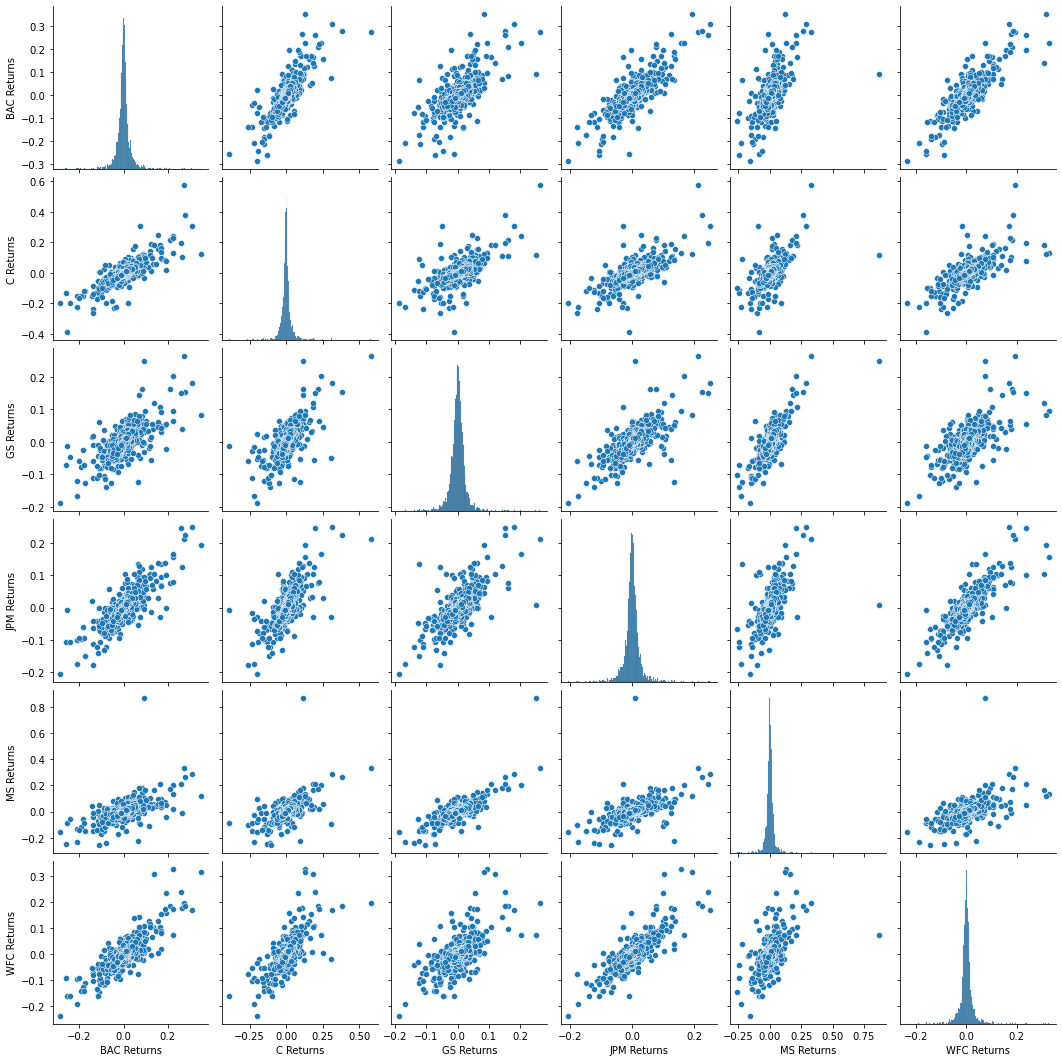

In [27]:
#Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(returns[1:])

In [28]:
#Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should 
#notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [38]:
#You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign 
#significant happen in that time frame?

returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [30]:
#Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time 
#period? Which would you classify as the riskiest for the year 2015?

returns.std()

#C

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [40]:
returns.loc['2015-1-1':'2015-12-31'].std()

#MS

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

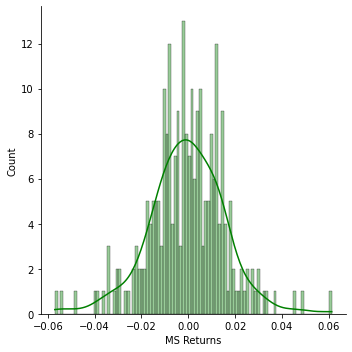

In [51]:
#Create a distplot using seaborn of the 2015 returns for Morgan Stanley

sns.displot(returns.loc['2015-1-1':'2015-12-31']['MS Returns'],bins=100,color='green',kde=True,alpha=0.4)

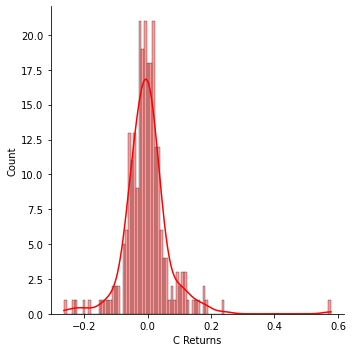

In [53]:
#Create a distplot using seaborn of the 2008 returns for CitiGroup

sns.displot(returns.loc['2008-1-1':'2008-12-31']['C Returns'],bins=100,color='red',alpha=0.4,kde=True)

# More Visualization

In [58]:
sns.set_style('whitegrid')

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

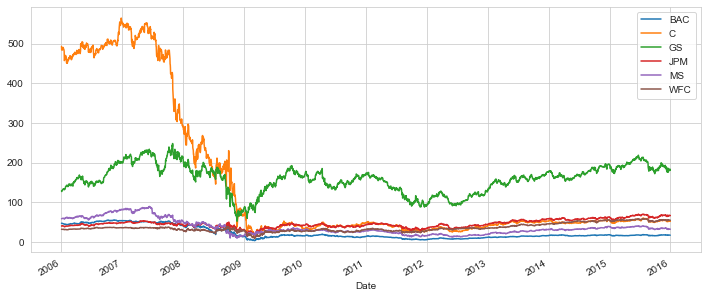

In [67]:
#Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use .xs to 
#get a cross section of the data.)

for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,5),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

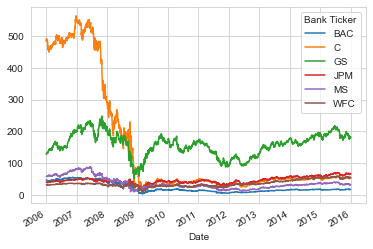

In [68]:
#Another Method

bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

# Moving Average 

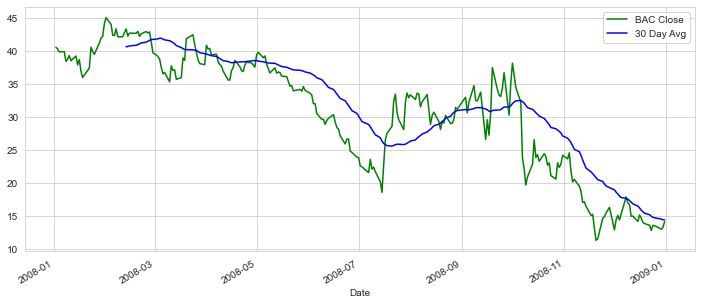

In [77]:
#Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

BAC['Close'].loc['2008-1-1':'2008-12-31'].plot(figsize=(12,5),color='Green',label='BAC Close')
BAC['Close'].loc['2008-1-1':'2008-12-31'].rolling(window=30).mean().plot(figsize=(12,5),color='blue',label='30 Day Avg')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

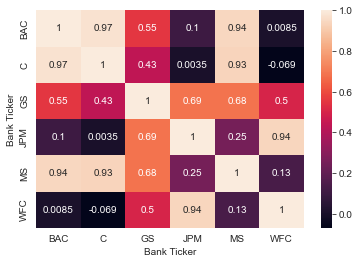

In [78]:
#Create a heatmap of the correlation between the stocks Close Price.

sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

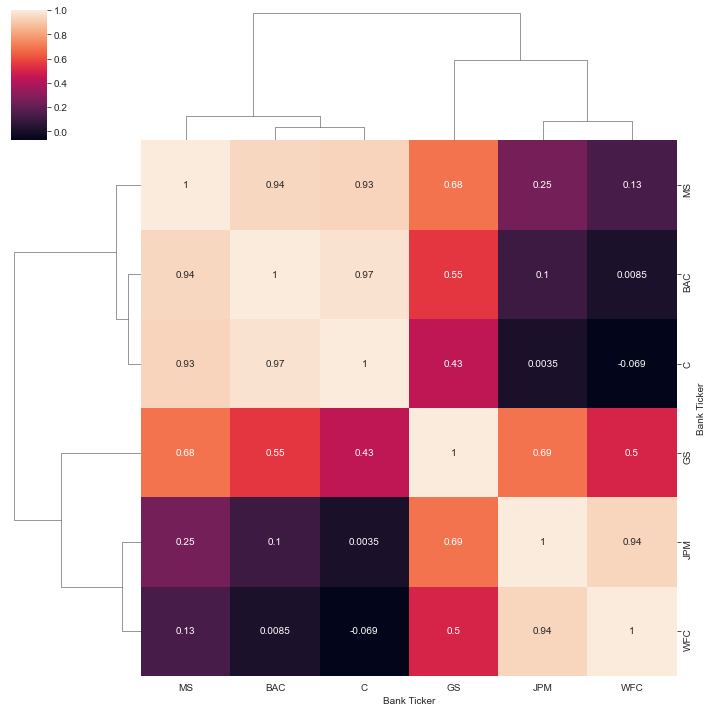

In [79]:
#Optional: Use seaborn's clustermap to cluster the correlations together:

sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)


In [81]:
#Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [83]:
#Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [85]:
#Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.

BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')